#**Import pytorch**

In [1]:
import torch
print(torch.__version__)

2.4.0+cpu


# **Elements of PyTorch**
## **3.11.2.1. PyTorch Tensors**

In [2]:
s=torch.tensor(8) #read a scalar
print(s)
print(s.ndim) #displays the dimension of the scalar
print(s.item()) #extract the number from the scalar

tensor(8)
0
8


In [3]:
v=torch.tensor([3,5,7]) #read a vector
print(v)
print(v.ndim) #displays the dimension of the vector
print(v.shape)#displays how the elements are arranged in the vector

tensor([3, 5, 7])
1
torch.Size([3])


In [4]:

m=torch.tensor([[2,5],[8,9]]) #read a matrix
print(m)
print(m.ndim) #displays the dimension of the vector
print(m.shape) #displays how the elements are arranged in the vector

tensor([[2, 5],
        [8, 9]])
2
torch.Size([2, 2])


## **3.11.2.4. Modules**

In [5]:
import torch
torch.manual_seed(20) #set a seed for reproducibility
linear_func=torch.nn.Linear(in_features=4,out_features=5) #create a fully connected layer using the module
x=torch.rand(size=(3,4)) #create the input for the fully connected layer
y=linear_func(x)
print("Input to the layer:",x)
print("Output of the layer:",y)

Input to the layer: tensor([[0.2113, 0.6839, 0.7478, 0.4627],
        [0.7742, 0.3861, 0.0727, 0.8736],
        [0.3510, 0.3279, 0.3254, 0.2399]])
Output of the layer: tensor([[ 0.1618,  0.0404,  0.3000, -0.1494, -0.2235],
        [ 0.0100, -0.5980,  0.1969,  0.0284, -0.5175],
        [ 0.1903, -0.1587,  0.3172, -0.1097, -0.1623]],
       grad_fn=<AddmmBackward0>)


**Example 3.11.1**

Training a neural network using PyTorch with MNIST database

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import numpy as np

# define variables and parameters
random_seed = 1
torch.manual_seed(random_seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batchsize_train = 64
batchsize_test = 1000
# Download and load the training data
trainloader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))])),batch_size=batchsize_train, shuffle=True)
# Download and load the test data
testloader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))])),batch_size=batchsize_test, shuffle=True)

#Define the neural network structure
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training of the model
epochs = 100
class_correct = [0]*10
class_total   = [0]*10
conf_matrix = np.zeros((10,10))
training_losses = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten the image data into a column vector
        images = images.view(images.shape[0], -1)
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # calculating the loss during training
        running_loss += loss.item()
        # Calculate and store the training loss for this epoch
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
    epoch_loss = running_loss / len(trainloader)
    training_losses.append(epoch_loss)
    print(f"Training loss for epoch {e + 1}: {epoch_loss}")

# Testing the model
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in testloader:
         images = images.view(images.shape[0], -1)
         outputs = model(images)
         _, predicted = torch.max(outputs.data, 1)
         correct_tensor = predicted.eq(labels.data.view_as(predicted))
         correct = np.squeeze(correct_tensor.numpy()) if device == "cpu" else np.squeeze(correct_tensor.cpu().numpy())
         # calculate test accuracy for each object class
         for i in range(labels.size(0)):
                   label = labels.data[i]
                   class_correct[label] += correct[i].item()
                   class_total[label] += 1
                   conf_matrix[label][predicted.data[i]] += 1

         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item()
     acc = 100.0 * n_correct / n_samples
     print(f'Accuracy on the 10000 test images: {acc} %')



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8089284.57it/s] 


Extracting C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 358712.26it/s]


Extracting C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1353741.71it/s]


Extracting C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\aswathyr/.pytorch/MNIST_data/MNIST\raw

Training loss: 0.4013935526582732
Training loss for epoch 1: 0.4013935526582732
Training loss: 0.18917046815577918
Training loss for epoch 2: 0.18917046815577918
Training loss: 0.13892720057480118
Training loss for epoch 3: 0.13892720057480118
Training loss: 0.11146493062380948
Training loss for epoch 4: 0.11146493062380948
Training loss: 0.09349365422486274
Training loss for epoch 5: 0.09349365422486274
Training loss: 0.08208260059317968
Training loss for epoch 6: 0.08208260059317968
Training loss: 0.07452569121389643
Training loss for epoch 7: 0.07452569121389643
Training loss: 0.0689345823949886
Training loss for epoch 8: 0.0689345823949886
Training loss: 0.05976311405855062
Training loss for epoch 9: 0.05976311405855062
Training loss: 0.0550092742536346
Training loss for epoch 10: 0.0550092742536346
Training loss: 0.05171348354070515
Training loss

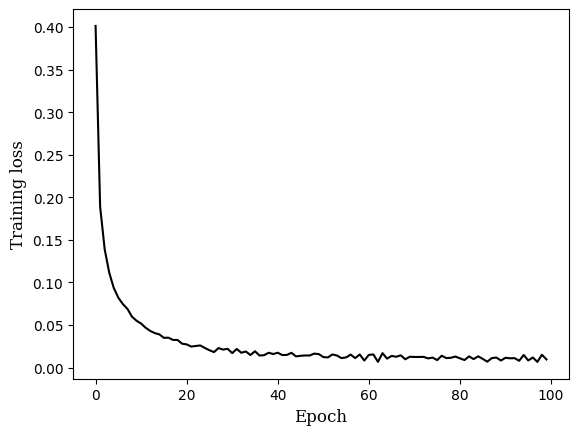

In [7]:
# plotting loss function
import matplotlib.pyplot as plt
plt.plot(training_losses,color='k')
label_font = {'size':'12'}
csfont = {'fontname':'serif'}
plt.xlabel('Epoch',fontdict=label_font,**csfont)
plt.ylabel('Training loss',fontdict=label_font,**csfont)
plt.savefig("Data/trainloss.pdf")
plt.show()

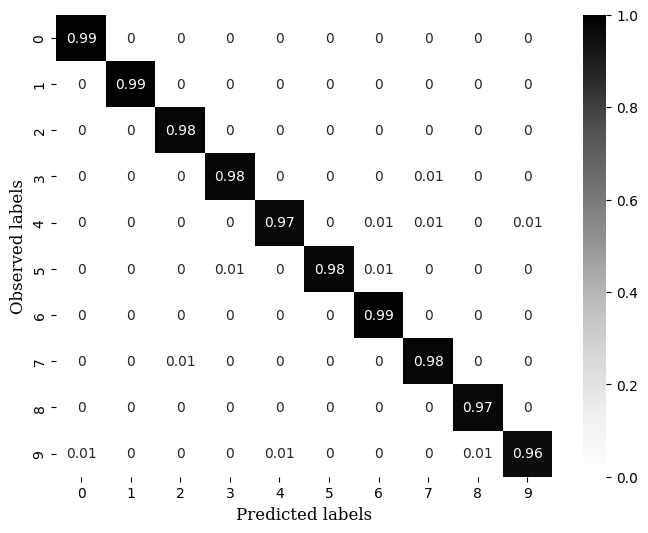

In [8]:
# Plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

C= np.around(conf_matrix / conf_matrix.astype(float).sum(axis=1),decimals=2)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(C, annot=True, vmax=1,cmap='Greys')
csfont = {'fontname':'serif'}
label_font = {'size':'12'}
ax.set_xlabel('Predicted labels', fontdict=label_font,**csfont);
ax.set_ylabel('Observed labels', fontdict=label_font,**csfont);
fig.savefig("Data/pytorch.pdf") #save the figure.
plt.show()